
#  异常值处理

异常值是指样本中的个别值，其数值明显偏离其余的观测值。
异常值也称离群点，异常值的分析也称为离群点的分析

异常值分析 → 3σ原则 / 箱型图分析
异常值处理方法 → 删除 / 修正填补



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.rcParams['axes.unicode_minus'] = False#解决负号无法正常显示的问题
% matplotlib inline

# 异常值分析
# （1）3σ原则：如果数据服从正态分布，异常值被定义为一组测定值中与平均值的偏差超过3倍的值 → p(|x - μ| > 3σ) ≤ 0.003

In [2]:
data = pd.Series(np.random.randn(10000)*100)
# 创建数据

u = data.mean()  # 计算均值
std = data.std()  # 计算标准差
stats.kstest(data, 'norm', (u, std))
print('均值为：%.3f，标准差为：%.3f' % (u,std))
print('------' *20)
# 正态性检验

均值为：1.169，标准差为：99.271
------------------------------------------------------------------------------------------------------------------------


异常值共18条


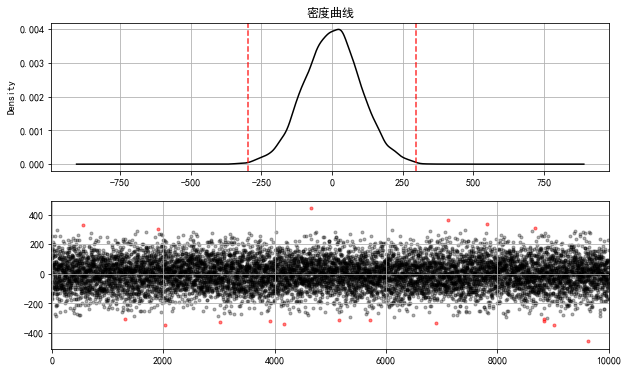

In [3]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
data.plot(kind = 'kde',grid = True,style = '-k',title = '密度曲线')
plt.axvline(3*std,hold=None,color='r',linestyle="--",alpha=0.8) 
plt.axvline(-3*std,hold=None,color='r',linestyle="--",alpha=0.8) 
# 绘制数据密度曲线

ax2 = fig.add_subplot(2,1,2)
error = data[np.abs(data - u) > 3*std]
data_c = data[np.abs(data - u) <= 3*std]
print('异常值共%i条' % len(error))
# 筛选出异常值error、剔除异常值之后的数据data_c

plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.xlim([-10,10010])
plt.grid()
# 图表表达

# 异常值分析
# （2）箱型图分析

count    10000.000000
mean         1.168726
std         99.271222
min       -455.315021
25%        -65.639383
50%          2.193787
75%         67.194512
max        442.336992
dtype: float64
------
分位差为：132.834，下限为：-264.890，上限为：266.445
------
异常值共80条


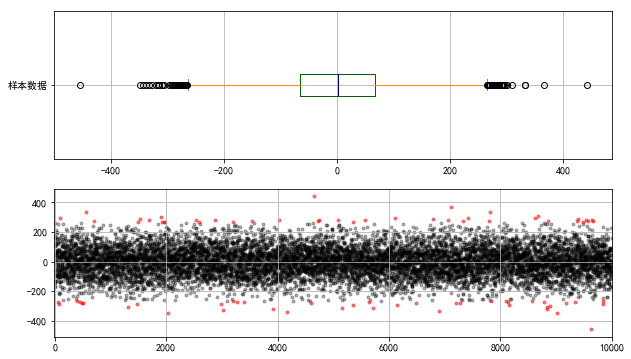

In [4]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid = True,color = color,ax = ax1,label = '样本数据')
# 箱型图看数据分布情况
# 以内限为界

s = data.describe()
print(s)
print('------')
# 基本统计量

q1 = s['25%']
q3 = s['75%']
iqr = q3 - q1
mi = q1 - 1.5*iqr
ma = q3 + 1.5*iqr
print('分位差为：%.3f，下限为：%.3f，上限为：%.3f' % (iqr,mi,ma))
print('------')
# 计算分位差

ax2 = fig.add_subplot(2,1,2)
error = data[(data < mi) | (data > ma)]
data_c = data[(data >= mi) & (data <= ma)]
print('异常值共%i条' % len(error))
# 筛选出异常值error、剔除异常值之后的数据data_c

plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.xlim([-10,10010])
plt.grid()
# 图表表达